## Capture du CO2 atmosphérique par transfert Gas/liquide

a)	Calculer la densité de flux massique de CO2 à travers une interface gaz/liquide. La pression partielle du dioxyde de carbone dans l'atmosphère est d'environ 360 µatm. On met en contact l’air est un liquide sans CO2 dissous.

b)	Dans quelle phase se situe la résistance au transfert ?

c)	Donner la concentration dans le gaz et le liquide à l'interface.

d)	Tracez le profil de concentration.

e)	Au bout d’un temps infini (c’est-à-dire quand il n’y aura plus de transfert entre les deux phases), quelle sera la concentration en CO2 dans l'eau ?

f)	Rajouter ce profil sur celui tracé en d)



Coeff de transfert de matière en phase gas     2.19e+00 m/s
Coeff de transfert de matière en phase liquide 1.97e-04 m/s
Coeff de transfert de matière global           1.64e-04 m/s
La résistance au transfert est localisée dans la phase liquide
Densité de flux de matière 2.41e-06 mole.m-2.s-1


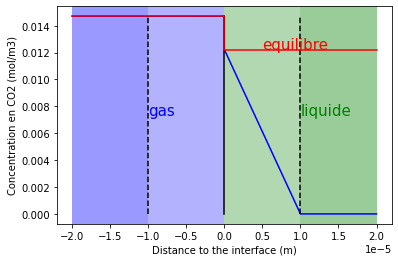

In [34]:
import numpy as np
import matplotlib.pyplot as plt

#données
R=8.32
T=298.15
#coeff de diffusion
D_g=0.219      #cm2/s
D_l=0.0000197  #cm2/s
D_g=D_g*0.0001 #m2/s
D_l=D_l*0.0001 #m2/s
#épaisseur de couche limite
delta_g=1e-5   #m
delta_l=1e-5   #m
#partition
He=0.8317      #c_l/c_g
K=1/He         #c_g/c_l

#Concentration gas dans le milieu ambiant
p_ga=360e-6 #atm
p_ga=360e-6*1.013e5 #Pa
c_ga=p_ga/(R*T) #mole/m3
c_la=0

#coefficient de transfert de matiere
kl=D_l/delta_l
kg=D_g/delta_g
print ('Coeff de transfert de matière en phase gas     {:.2e} m/s'.format(kg))
print ('Coeff de transfert de matière en phase liquide {:.2e} m/s'.format(kl))
kgl=1/(1/kg+K/kl)
print ('Coeff de transfert de matière global           {:.2e} m/s'.format(kgl))
if 1/kg > 3*K/kl:
    print ('La résistance au transfert est localisée dans la phase gaz')
elif K/kl > 3/kg:
    print ('La résistance au transfert est localisée dans la phase liquide')
else :
    print ('Les résistances au transfert sont du même ordre de grandeur')

j=kgl*(c_ga-c_la)
print ('Densité de flux de matière {:.2e} mole.m-2.s-1'.format(j) )
c_gi=c_ga-j/kg
c_li=c_la+j/kl

plt.plot([-2*delta_g,-delta_g,0,0,delta_l,2*delta_l], [c_ga,c_ga,c_gi,c_li,c_la,c_la],'b')
plt.plot([-delta_g,-delta_g], [0,c_ga],'k--')
plt.plot([0,0], [0,c_ga],'k') 
plt.plot([delta_l,delta_l], [0,c_ga],'k--')
plt.plot([-2*delta_g,-delta_g,0,0,delta_l,2*delta_l], [c_ga,c_ga,c_ga,He*c_ga,He*c_ga,He*c_ga],'r')
plt.text(0.5e-5,He*c_ga, 'equilibre', c='r', size=15)
plt.text(1e-5,c_ga/2, 'liquide', c='g', size=15)
plt.text(-1e-5,c_ga/2, 'gas', c='b', size=15)
plt.axvspan(0, -delta_g, facecolor='blue', alpha=0.3)
plt.axvspan(-delta_g, -2*delta_g, facecolor='blue', alpha=0.4)
plt.axvspan(0, delta_l, facecolor='green', alpha=0.3)
plt.axvspan(delta_l, 2*delta_l, facecolor='green', alpha=0.4)
plt.xlabel('Distance to the interface (m)')
plt.ylabel('Concentration en CO2 (mol/m3)')
plt.show()    


Dans un procédé de capture de CO2, on met en contact le gaz avec de l’eau constamment renouvelée pour assurer le transfert (il faut être hors équilibre).

g) Calculer au bout de combien de temps, il serait possible de capturer 90 % du CO2 contenu dans 1 m3 d’air avec une interface gaz-liquide de 1 m2 (on considère pour cela une succession d’équilibres entre le gaz et le liquide au cours du temps -modèle pseudo steady state-).

> Pour cela, il est nécessaire de faire un bilan sur le CO2 dans le volume de gaz. On considère que la variation du nombre de mole au cours du temps est égale au flux de sortie du CO2 vers la phase gaz : 
$$\frac{dn}{dt}=-k_{gl} c S $$
pù c est la concentration en CO_2 dans le gaz et S ma surface de l'interface gas-liquide. Le nombre de mole est égale au produit de la concentration et du volume de gaz $dn=d(c.V)$ soit :
$$V\frac{dc}{dt}+c\frac{dV}{dt}=-k_{gl} c S $$
On considère que le volume de gaz reste constant $\frac{dV}{dt}=0$ car le départ du CO2 très dilué dans la phase gaz engendre un changement négligeable. Le bilan s'écrit alors :
$$\frac{dc}{dt}=-k_{gl} c \frac{S}{V} $$
En séparant les variables, on peut écrire :
$$\frac{dc}{c}=-k_{gl} \frac{S}{V} dt $$
En intégrant, il est possible de trouver la forme générale de la concentration en fonction du temps :
$$ln(c)=-k_{gl} \frac{S}{V} t + K $$
où K est la constante d'intégration que l'on peut déterminer en écrivant la condition initiale :
$$t=0 c=c_0$$
en injectant la condition limite dans la forme générale, on trouve $K=ln(c_0)$ soit :
$$ln(\frac{c}{c_0})=-k_{gl} \frac{S}{V} t $$
ou sous forme exponentielle :
$$\frac{c}{c_0}=e^{-k_{gl} \frac{S}{V} t} $$
On aura capturé 90 % de CO2 contenu dans l'air quand il ne restera que 10% soit $\frac{c}{c_0}=0.1$. Le temps nécessaire est donc :
$$t_{0.1}=-ln(0.1)\frac{V}{S k_{gl}}=\frac{V}{S k_{gl}}ln(10)$$

temps pour la capture en s 14054.5
temps pour la capture en h 3.9


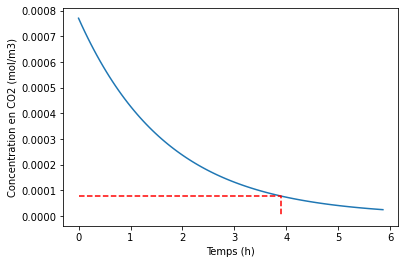

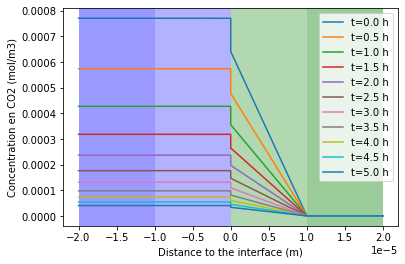

In [36]:
c_ga0=c_ga
S=1 #m2
V=1 #m3
t10=-np.log(0.1)*V/(S*kgl)
print ('temps pour la capture en s',round(t10,2))
print ('temps pour la capture en h', round(t10/3600,2))


tplot=np.linspace(0,t10*1.5,100)
plt.plot(tplot/3600,c_ga0*np.exp(-S*kgl*tplot/V))
plt.plot([0,t10/3600,t10/3600],[c_ga0/10,c_ga0/10,0],'r--')
plt.xlabel('Temps (h)')
plt.ylabel('Concentration en CO2 (mol/m3)')
plt.show()

for t in [0,1800,3600,5400,7200,9000,10800,12600,14400,16200,18000]:
    c_ga=c_ga0*np.exp(-S*kgl*t/V)
    j=kgl*(c_ga-c_la)
    c_gi=c_ga-j/kg
    c_li=c_la+j/kl
    plt.plot([-2*delta_g,-delta_g,0,0,delta_l,2*delta_l], [c_ga,c_ga,c_gi,c_li,c_la,c_la], label='t={:.1f} h'.format(t/3600))

plt.axvspan(0, -delta_g, facecolor='blue', alpha=0.3)
plt.axvspan(-delta_g, -2*delta_g, facecolor='blue', alpha=0.4)
plt.axvspan(0, delta_l, facecolor='green', alpha=0.3)
plt.axvspan(delta_l, 2*delta_l, facecolor='green', alpha=0.4)
plt.xlabel('Distance to the interface (m)')
plt.ylabel('Concentration en CO2 (mol/m3)')
plt.legend()
plt.show()    


h) Discuter des moyens d’améliorer la capture du CO2.
> 1. L'adsorption se réalise par diffusion. On parle d'adsorption physique. Pour accélérer l'adsorption, on peut placer un réactif dans la phase liquide qui consomme le CO2 au fur et à mesure de son adsorption. On parle alors d'adsorption chimique. 
> 2. On peut également améliorer la vitesse de transfert en réduisant les épaisseurs de couche limite : c'est à dire en augmentant la vitesse relative entre la phase gaz et la phase liquide. 
> 3. On peut également chercher à augmenter la surface gaz/liquide (à l'aide de garnissage dans une colonne par exemple)